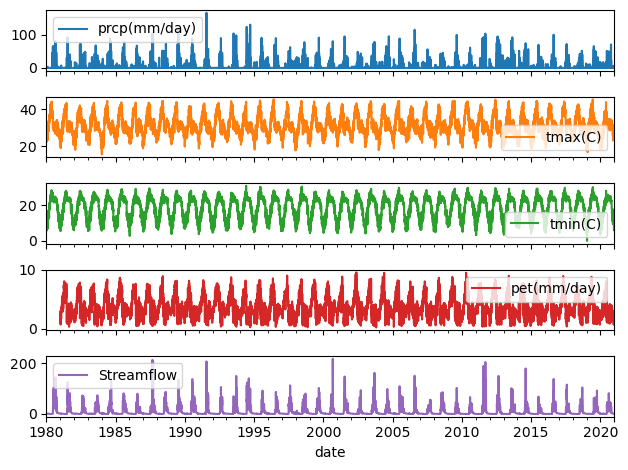

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the data file
path = r'C:\Users\lokes\Downloads\08023 Data.csv'

# Load the dataset into a DataFrame, using the first column as the index
data = pd.read_csv(path, index_col=0)

# Convert the index to datetime format for time series analysis
data.index = pd.to_datetime(data.index, format="%d-%m-%Y")

# Plot all columns of the DataFrame as subplots for visual inspection
data.plot(subplots=True)
plt.tight_layout()  # Adjust layout to prevent overlap


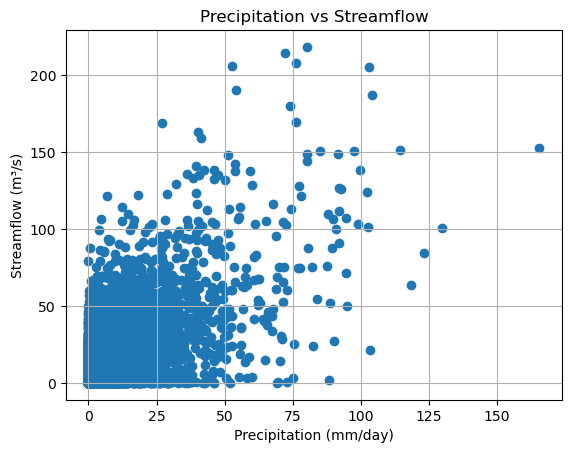

In [2]:
#%% Scatter Plot to visualize the relationship between precipitation and streamflow
plt.figure()
plt.scatter(data['prcp(mm/day)'], data['Streamflow'])
plt.title('Precipitation vs Streamflow')  # Add title to the plot
plt.xlabel('Precipitation (mm/day)')  # Label for x-axis
plt.ylabel('Streamflow (m³/s)')  # Label for y-axis
plt.grid()  # Add grid for better readability

In [3]:
#%% Import additional libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame (not necessary here, since 'data' is already a DataFrame)
df = pd.DataFrame(data)

In [4]:
# Define features (X) and target variable (y)
# We will predict Streamflow based on precipitation
X = df[['prcp(mm/day)']]  # Feature: daily precipitation
y = df['Streamflow']       # Target: streamflow

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)  # Lower values indicate better fit
print("R² Score:", r2)              # Values closer to 1 indicate a better fit

# Print the coefficients of the model
print("Coefficients:", model.coef_)  # Slope of the regression line
print("Intercept:", model.intercept_)  # Intercept of the regression line

Mean Squared Error: 146.45855692741966
R² Score: 0.435803443608872
Coefficients: [1.20711903]
Intercept: 4.630870582111573


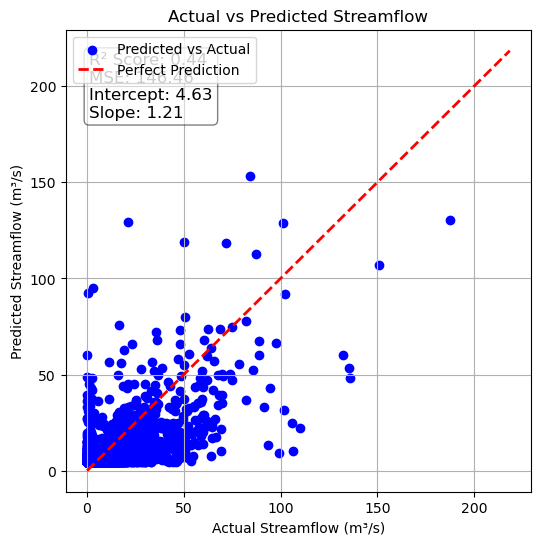

In [5]:
# Plotting actual vs predicted streamflow to visualize model performance
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  # Scatter plot of actual vs predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')  # Diagonal line for perfect predictions

# Labeling axes
plt.xlabel('Actual Streamflow (m³/s)')  # Label for x-axis
plt.ylabel('Predicted Streamflow (m³/s)')  # Label for y-axis
plt.title('Actual vs Predicted Streamflow')  # Title of the plot
plt.legend()  # Show legend
plt.grid()  # Add grid for better readability

# Adding a textbox with model performance metrics
textstr = f'R² Score: {r2:.2f}\nMSE: {mse:.2f}\nIntercept: {model.intercept_:.2f}\nSlope: {model.coef_[0]:.2f}'

# Positioning the textbox
plt.gca().add_artist(plt.Text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)))

# Display the plot
plt.show()  # Display the plot